# DRL Assignment 1

Title: Applying Markov Decision Process for obtaining the optimized route for transportation.

Members:

YASHODHA  - R 2022ac05366

YUVARAJ KUMAR N A - 2022ac05048

SUBASH A - 2022ac05205

SAHIL - 2022ac05759

# 1
Discuss in detail how Markov Decision Process (MDP) can help in route planning application.
Justify your answer in 350-400 words. Explain in detail your environment, state space, action space and equations aligned with the given problem.

Markov Decision Process is a stochastic decision making process. Basic assumption of MDP is future state is solely dependent on current state only. Also Class conditional independence law is applicable in MDP problems which mean one predictor is independent of other predictors given in the problem.

MDP plays a significant role in solving route planning application. MDP helps in following ways:

**Modeling Uncertainty:** MDP planner uses likelihood in finding the optimal path which deals with dynamic or uncertain factors

**Sequential Decision Making:** MDP gives a format to deal with problems which are episodic or sequential in nature. And Route optimization problems are such where we need to find optimal path when ever a node is reached.

**Optimizing:** MDP gives an option to consider cumulative value of current action and its future propogations. So it is a best candidate to choose for these type of problem.

**Trade-off Analysis:** MDP gives an option to find trade-off when multiple predictors are involved. Scenario 4 given in the problem deals with combo of multiple predictors like Time, Cost and Traffic Intensity.

**Adaptability:** MDP helps systems adapt to changing conditions over time. Cases when there is need of dynamic decision making as new traffic update is added, MDP reevaluate its decisions and adjust the route accordingly, taking all the variable like states and uncertainities into consideration.





# ENVIRONMENT, STATE SPACE, ACTION SPACE AND EQUATIONS :


Problem is finding optimal route wrt individual predictor parameters Time, Cost, Traffic and combo parameter (Time, Cost & Traffic).


Agent here is the driver who have to find the optimal route from A to B considering different parameters given above.

States s available are (A, B, C, D, E, F).

Actions a available are (R1, R2, R3, R4, R5, R6, R7, R8) which stand for (Route1, Route2, Route3, Route4, Route5, Route6, Route7, Route8) respectively

Rt is Reward of immediate step wrt time t

Expected Return Gt = Rt+1 + γRt+2 + γ2Rt+3 + γ3Rt+4 + ...

Transition Probability is P (St+1|st.at)


Discounted factor assumed is γ = 0.1


# Setting Libraries

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
## set working directory
file_path = "/content/drive/MyDrive/[00] BITS/SEM2/DRL Ass 1"
os.chdir(file_path)
!ls

'DRL Group 66_Assignment 1.ipynb'   Helper.xlsx  'Untitled spreadsheet.gsheet'


In [3]:
## Read Data
df = pd.read_excel("Helper.xlsx")
df.head()

,Route,Time,Cost,Traffic Intensity,Selection,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,R1,Best,Minimum,Medium,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R2,Average,Minimum,Medium,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R3,Best,Maximum,Low,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R6,Worst,Maximum,High,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R4,Average,Minimum,High,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## Filter the data
## Preprocess and clean the data
data =df[['Route', 'Time', 'Cost', 'Traffic Intensity', 'Selection']][:18 :]
data.head()

,Route,Time,Cost,Traffic Intensity,Selection
0,R1,Best,Minimum,Medium,Yes
1,R2,Average,Minimum,Medium,Yes
2,R3,Best,Maximum,Low,No
3,R6,Worst,Maximum,High,Yes
4,R4,Average,Minimum,High,No


# Bellman Equation

In [6]:
## Setting cost parameter for Predictors

Time = {"Best":3 , "Average":2 , "Worst":1}
Cost = {"Maximum":1, "Minimum":2}
Traffic_Intesitity = {"Low": 3,"Medium":2, "High":1}

possible_route_combination = {"route1": ["R1", "R7"], "route2": ["R2", "R4", "R7"], "route3":["R2", "R6", "R8"],
                               "route4": ["R3", "R5", "R8"]}

possible_route_combinations = {"route1": ["R1 --> R7"], "route2": ["R2 --> R4 --> R7"],
                               "route3":["R2 --> R6 --> R8"],"route4": ["R3 --> R5 --> R8"]}

discountFactor = 0.1

In [7]:

def calculate_Route_score_fixed(df, discountFactor):
  """
  Function takes input as dataframe with values of different Predictors - Time, Cost and Traffic_Intesitity to calculate the total gain
  """
  crs = {}
  route1 = df[df["Route"] == "R1"]["Softmax"].values + 0.1*df[df["Route"] == "R7"]["Softmax"].values
  #route1 = df[df["R1"]] + discountFactor*df[df["R7"]]
  crs.update({"route1":route1})

  #route2 = df["R2"] + discountFactor*df["R4"] + (discountFactor^2)*(df["R7"])
  route2 = df[df["Route"] == "R2"]["Softmax"].values + 0.1*df[df["Route"] == "R4"]["Softmax"].values + (0.1**2)* df[df["Route"] == "R7"]["Softmax"].values
  crs.update({"route2":route2})

  route3 = df[df["Route"] == "R2"]["Softmax"].values + 0.1*df[df["Route"] == "R6"]["Softmax"].values + (0.1**2)* df[df["Route"] == "R8"]["Softmax"].values
  crs.update({"route3":route3})

  route4 = df[df["Route"] == "R3"]["Softmax"].values + 0.1*df[df["Route"] == "R5"]["Softmax"].values + (0.1**2)* df[df["Route"] == "R8"]["Softmax"].values
  crs.update({"route4":route4})

  return crs

In [8]:
Unique_routes = data["Route"].unique()

def convertDictionary(dicta):
  """
  Convert dictionary into Dataframe
  """
  df = pd.DataFrame(columns=['Route', 'AvgScore'])
  r = [key for key in dicta.keys()]
  c = [values  for values in dicta.values()]
  df['Route'] = r
  df['AvgScore'] = c
  return df

### TIME

Optimize the route with respect to time

Print all the transition probabilities for each state and action for every scenario.

Print all the iterations for each and every scenario with how the algorithm is finding the best optimal route.

In [24]:
## Create a Dictionary for Time
newDic_Time = {}
sum_tot, len_v = [], []
for each in Unique_routes:
  #print(each)

  f = data[data['Route'] == each]["Time"]
  l = f.values.tolist()
  sum_total = 0
  for e in l:
    sum_total = sum_total + Time[e]



  newDic_Time.update({each:sum_total/len(l)})
  sum_tot.append(sum_total)
  len_v.append(len(l))

timeDataF = convertDictionary(newDic_Time)
timeDataF['sum_tot'] = sum_tot
timeDataF['len_v'] =len_v
## Add Softmax Probability Score
timeDataF["Softmax"] = timeDataF["AvgScore"].apply(lambda x: x/timeDataF["AvgScore"].sum())
timeDataF

,Route,AvgScore,sum_tot,len_v,Softmax
0,R1,2.333333,7,3,0.144330
1,R2,2.500000,5,2,0.154639
2,R3,2.333333,7,3,0.144330
3,R6,1.500000,3,2,0.092784
4,R4,1.500000,3,2,0.092784
5,R5,1.500000,3,2,0.092784
6,R7,1.500000,3,2,0.092784
7,R8,3.000000,6,2,0.185567


#### Applying Bellman Equation to Find Best Route


Gt =Rt+1+γRt+2+γ2Rt+3 +γ3Rt+4+...

In [25]:
CRS = calculate_Route_score_fixed(timeDataF, discountFactor)
print("Cost of Each Route is \n", CRS)
maximum_value = np.array([e for e in CRS.values()]).max()
print("Route with Maximum Value is \n", maximum_value)
Rmax = [key for key, value in CRS.items() if value == maximum_value][0]
print("Route Number Which has maximum value,",Rmax)
print("The Entire path for Max Route is ",possible_route_combinations[Rmax])


Cost of Each Route is 
 {'route1': array([0.15360825]), 'route2': array([0.16484536]), 'route3': array([0.1657732]), 'route4': array([0.15546392])}
Route with Maximum Value is 
 0.16577319587628864
Route Number Which has maximum value, route3
The Entire path for Max Route is  ['R2 --> R6 --> R8']


### Cost

Optimize the route with respect to Cost

Print all the transition probabilities for each state and action for every scenario.

Print all the iterations for each and every scenario with how the algorithm is finding the best optimal route.

In [26]:
## Create a Dictionary for Time
newDic_ = {}
sum_tot, len_v = [], []
for each in Unique_routes:
  #print(each)

  f = data[data['Route'] == each]["Cost"]
  l = f.values.tolist()
  sum_total = 0
  for e in l:
    sum_total = sum_total + Cost[e]



  newDic_.update({each:sum_total/len(l)})
  sum_tot.append(sum_total)
  len_v.append(len(l))

CostDataF = convertDictionary(newDic_)
CostDataF['sum_tot'] = sum_tot
CostDataF['len_v'] =len_v

## Add Softmax Probability Score
CostDataF["Softmax"] = CostDataF["AvgScore"].apply(lambda x: x/CostDataF["AvgScore"].sum())
CostDataF



,Route,AvgScore,sum_tot,len_v,Softmax
0,R1,1.666667,5,3,0.131579
1,R2,1.500000,3,2,0.118421
2,R3,1.000000,3,3,0.078947
3,R6,1.500000,3,2,0.118421
4,R4,2.000000,4,2,0.157895
5,R5,1.000000,2,2,0.078947
6,R7,2.000000,4,2,0.157895
7,R8,2.000000,4,2,0.157895


#### Applying Bellman Equation to Find Best Route


Gt =Rt+1+γRt+2+γ2Rt+3 +γ3Rt+4+...

In [27]:
CRS = calculate_Route_score_fixed(CostDataF, discountFactor)
print("Cost of Each Route is \n", CRS)
maximum_value = np.array([e for e in CRS.values()]).max()
print("Route with Maximum Value is \n", maximum_value)
Rmax = [key for key, value in CRS.items() if value == maximum_value][0]
print("Route Number Which has maximum value,",Rmax)
print("The Entire path for Max Route is ",possible_route_combinations[Rmax])


Cost of Each Route is 
 {'route1': array([0.14736842]), 'route2': array([0.13578947]), 'route3': array([0.13184211]), 'route4': array([0.08842105])}
Route with Maximum Value is 
 0.14736842105263157
Route Number Which has maximum value, route1
The Entire path for Max Route is  ['R1 --> R7']


### Traffic Intensity
Optimize the route with respect to Traffic Intensity

Print all the transition probabilities for each state and action for every scenario.

Print all the iterations for each and every scenario with how the algorithm is finding the best optimal route.

In [28]:
## Create a Dictionary for Time
newDic_ = {}
sum_tot = []
for each in Unique_routes:
  #print(each)

  f = data[data['Route'] == each]["Traffic Intensity"]
  l = f.values.tolist()
  sum_total = 0
  for e in l:
    sum_total = sum_total + Traffic_Intesitity[e]



  newDic_.update({each:sum_total/len(l)})
  sum_tot.append(sum_total)

trafficDataF = convertDictionary(newDic_)
trafficDataF['sum_tot'] = sum_tot
## Add Softmax Probability Score
trafficDataF["Softmax"] = trafficDataF["AvgScore"].apply(lambda x: x/trafficDataF["AvgScore"].sum())
trafficDataF


,Route,AvgScore,sum_tot,Softmax
0,R1,2.666667,8,0.163265
1,R2,2.000000,4,0.122449
2,R3,2.666667,8,0.163265
3,R6,2.000000,4,0.122449
4,R4,1.500000,3,0.091837
5,R5,1.000000,2,0.061224
6,R7,2.000000,4,0.122449
7,R8,2.500000,5,0.153061


#### Applying Bellman Equation to Find Best Route


Gt =Rt+1+γRt+2+γ2Rt+3 +γ3Rt+4+...

In [29]:
CRS = calculate_Route_score_fixed(trafficDataF, discountFactor)
print("Cost of Each Route is \n", CRS)
maximum_value = np.array([e for e in CRS.values()]).max()
print("Route with Maximum Value is \n", maximum_value)
Rmax = [key for key, value in CRS.items() if value == maximum_value][0]
print("Route Number Which has maximum value,",Rmax)
print("The Entire path for Max Route is ",possible_route_combinations[Rmax])


Cost of Each Route is 
 {'route1': array([0.1755102]), 'route2': array([0.13285714]), 'route3': array([0.13622449]), 'route4': array([0.17091837])}
Route with Maximum Value is 
 0.17551020408163268
Route Number Which has maximum value, route1
The Entire path for Max Route is  ['R1 --> R7']


### Considering All Factors

Optimize the route with respect to all challenges

Print all the transition probabilities for each state and action for every scenario.

Print all the iterations for each and every scenario with how the algorithm is finding the best optimal route.


In [30]:
ToT = pd.DataFrame(columns = ["Route", "Total Sum", "Length"])
ToT["Route"] = timeDataF["Route"]
ToT["Total Sum"] = timeDataF['sum_tot'] + CostDataF['sum_tot']+trafficDataF['sum_tot']
ToT["Length"] = timeDataF['len_v']
ToT["Average_Score"] = ToT["Total Sum"]/ToT["Length"]
ToT["Softmax"] = ToT["Average_Score"].apply(lambda x: x/ToT["Average_Score"].sum())
ToT

,Route,Total Sum,Length,Average_Score,Softmax
0,R1,20,3,6.666667,0.147601
1,R2,12,2,6.000000,0.132841
2,R3,18,3,6.000000,0.132841
3,R6,10,2,5.000000,0.110701
4,R4,10,2,5.000000,0.110701
5,R5,7,2,3.500000,0.077491
6,R7,11,2,5.500000,0.121771
7,R8,15,2,7.500000,0.166052


In [31]:
CRS = calculate_Route_score_fixed(ToT, discountFactor)
print("Cost of Each Route is \n", CRS)
maximum_value = np.array([e for e in CRS.values()]).max()
print("Route with Maximum Value is \n", maximum_value)
Rmax = [key for key, value in CRS.items() if value == maximum_value][0]
print("Route Number Which has maximum value,",Rmax)
print("The Entire path for Max Route is ",possible_route_combinations[Rmax])


Cost of Each Route is 
 {'route1': array([0.1597786]), 'route2': array([0.14512915]), 'route3': array([0.14557196]), 'route4': array([0.14225092])}
Route with Maximum Value is 
 0.15977859778597786
Route Number Which has maximum value, route1
The Entire path for Max Route is  ['R1 --> R7']


# Conclusion ::

By applying MDP formula, we were able to find the optimal path for all 4 different scenarios.


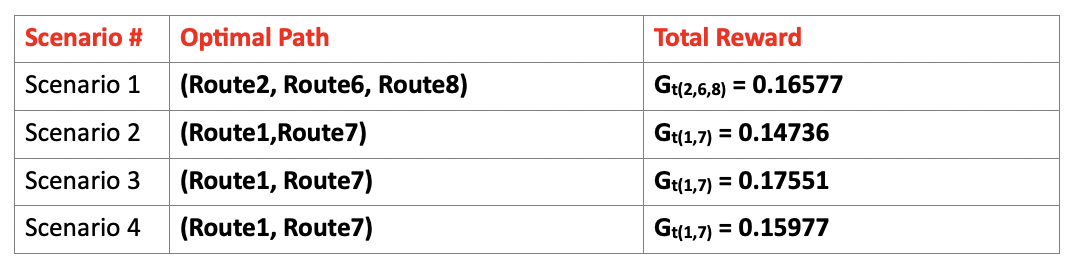


We were able to find the transition probability of every state using the Bellman equation. Same is printed above in the diagram. The possible traverse path for the Agent(driver in this case) is taken from the state diagram given in the problem. A total of 4 possible traverse paths were found and the Total Reward or Gain of each path is calculated. And the one which yields maximum Gain is identified as the optimal path.

